https://www.kaggle.com/datasets/jaidalmotra/pokemon-dataset

# Pokemon Veri Seti Analizi
# FURKAN TATAROĞLU
# G201210089
# VERİ BİLİMİ 1. ÖDEVİ


## Content:
# Loading and displaying the dataset.
# Filling missing values.
# Plotting categorical and numerical variables.
# Basic data analysis.
# Splitting the data into training and testing sets.
# Finding and handling missing values.
# Visualizations.
# Basic feature engineering.
# Saving the cleaned dataset.

In [1]:
!pip3 install requests
!pip install ucimlrepo


In [2]:
import requests
import zipfile
import io
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")


<ipython-input-2-561e29818d28>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [3]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [4]:
!ls /content/drive/My\ Drive/

'00_BilgisayarAglari_TumIcerik_2024_2li (1).pdf'
 ColabDataScience
 ColabPhytonCourses
'Free UI Click Sound Effects Pack.zip'
'Furkan Tataroğlu.pdf'
 önemliler.zip
'Platformerlarda Juiyclik Atölyesi _ Ata Türkoğlu.mp4'
 PlayerMovement.cs
 ŞİFRELER.txt
"Skooti's checklists dosyasının kopyası.gsheet"
'Unity Projects.rar'
 version7.0.zip
'Yapayzeka_EDA (1).ipynb'
 YEDEKLER


In [5]:
kaggle_json_path = '/content/drive/My Drive/ColabDataScience/kaggle.json'

# `kaggle.json` dosyasını .kaggle dizinine taşıyın
!mkdir -p ~/.kaggle
!cp "{kaggle_json_path}" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Dataseti Listele

In [7]:
!kaggle datasets download -d jaidalmotra/pokemon-dataset

# İndirilen zip dosyasını açmak
with zipfile.ZipFile("pokemon-dataset.zip", 'r') as z:
    z.extractall("pokemon_dataset")

# Açılan CSV dosyasını okumak
pokemon_df= pd.read_csv("pokemon_dataset/Pokemon.csv")

# DataFrame'in ilk birkaç satırını göstermek
print(pokemon_df.head())




Dataset URL: https://www.kaggle.com/datasets/jaidalmotra/pokemon-dataset
License(s): MIT
pokemon-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
   number                 name  type1   type2  total  hp  attack  defense  \
0       1            Bulbasaur  Grass  Poison    318  45      49       49   
1       2              Ivysaur  Grass  Poison    405  60      62       63   
2       3             Venusaur  Grass  Poison    525  80      82       83   
3       3        Mega Venusaur  Grass  Poison    625  80     100      123   
4       3  Gigantamax Venusaur  Grass  Poison    525  80      82       83   

   sp_attack  sp_defense  speed  generation  legendary  
0         65          65     45           1      False  
1         80          80     60           1      False  
2        100         100     80           1      False  
3        122         120     80           1      False  
4        100         100     80           1      False  


In [8]:
# Temel İstatistikler ve Eksik Değerler
print(pokemon_df.describe())
print(pokemon_df.isnull().sum())

            number        total           hp       attack      defense  \
count  1072.000000  1072.000000  1072.000000  1072.000000  1072.000000   
mean    445.219216   440.885261    70.486940    80.938433    74.968284   
std     267.772806   121.379077    26.868039    32.463582    31.208059   
min       1.000000   175.000000     1.000000     5.000000     5.000000   
25%     209.750000   330.000000    50.000000    56.000000    52.000000   
50%     442.500000   460.500000    68.000000    80.000000    70.000000   
75%     681.250000   519.250000    84.000000   100.000000    90.000000   
max     898.000000  1125.000000   255.000000   190.000000   250.000000   

         sp_attack   sp_defense        speed   generation  
count  1072.000000  1072.000000  1072.000000  1072.000000  
mean     73.273321    72.476679    68.792910     4.294776  
std      32.643119    27.934253    30.076281     2.346472  
min      10.000000    20.000000     5.000000     0.000000  
25%      50.000000    50.000000  

In [9]:
# 'type2' eksik değerlerini 'None' ile doldur
pokemon_df['type2'].fillna('None', inplace=True)

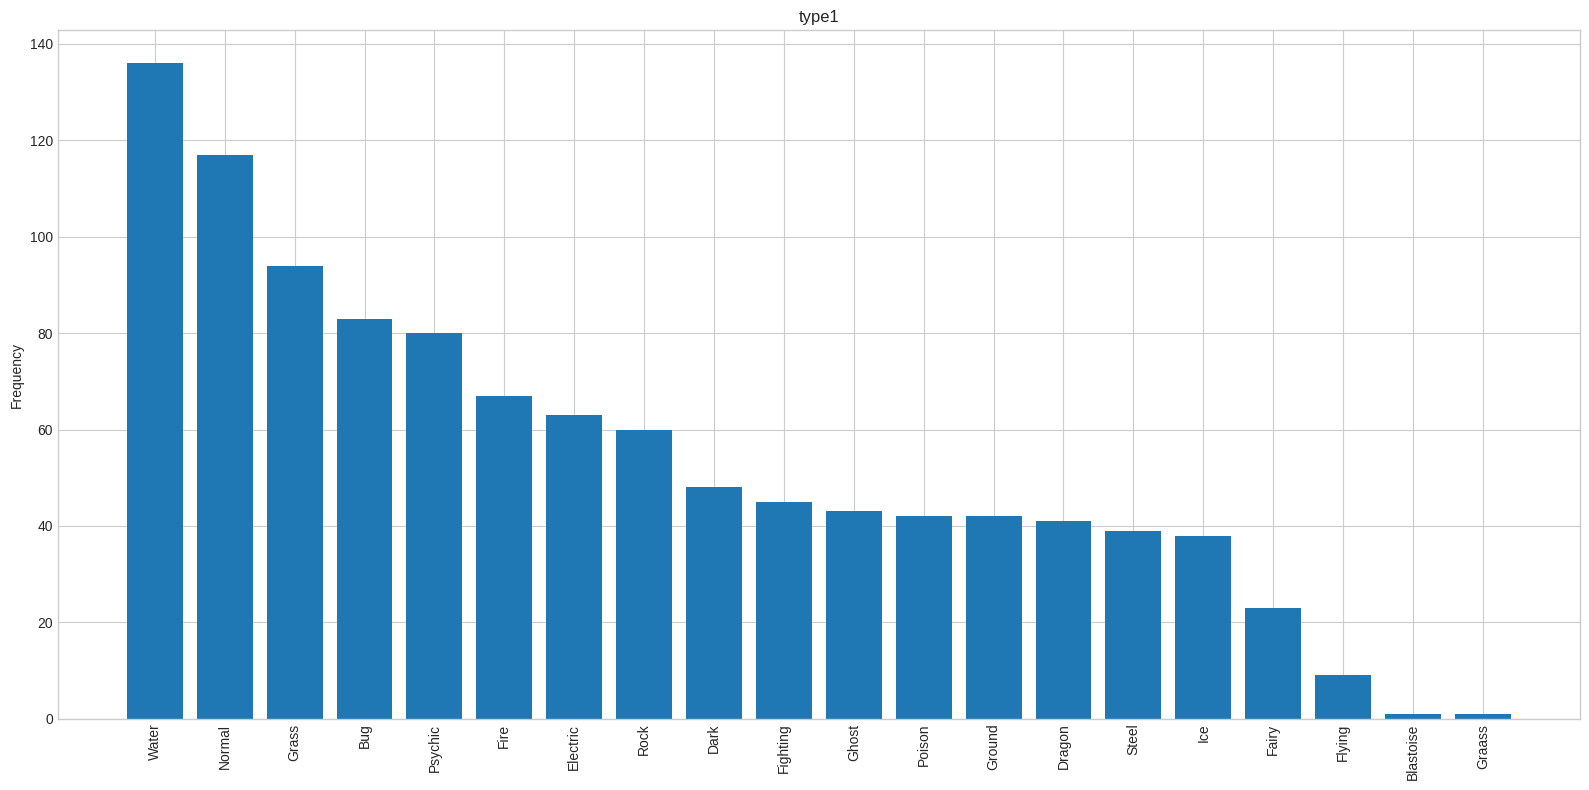

type1: 
 type1
Water        136
Normal       117
Grass         94
Bug           83
Psychic       80
Fire          67
Electric      63
Rock          60
Dark          48
Fighting      45
Ghost         43
Poison        42
Ground        42
Dragon        41
Steel         39
Ice           38
Fairy         23
Flying         9
Blastoise      1
Graass         1
Name: count, dtype: int64


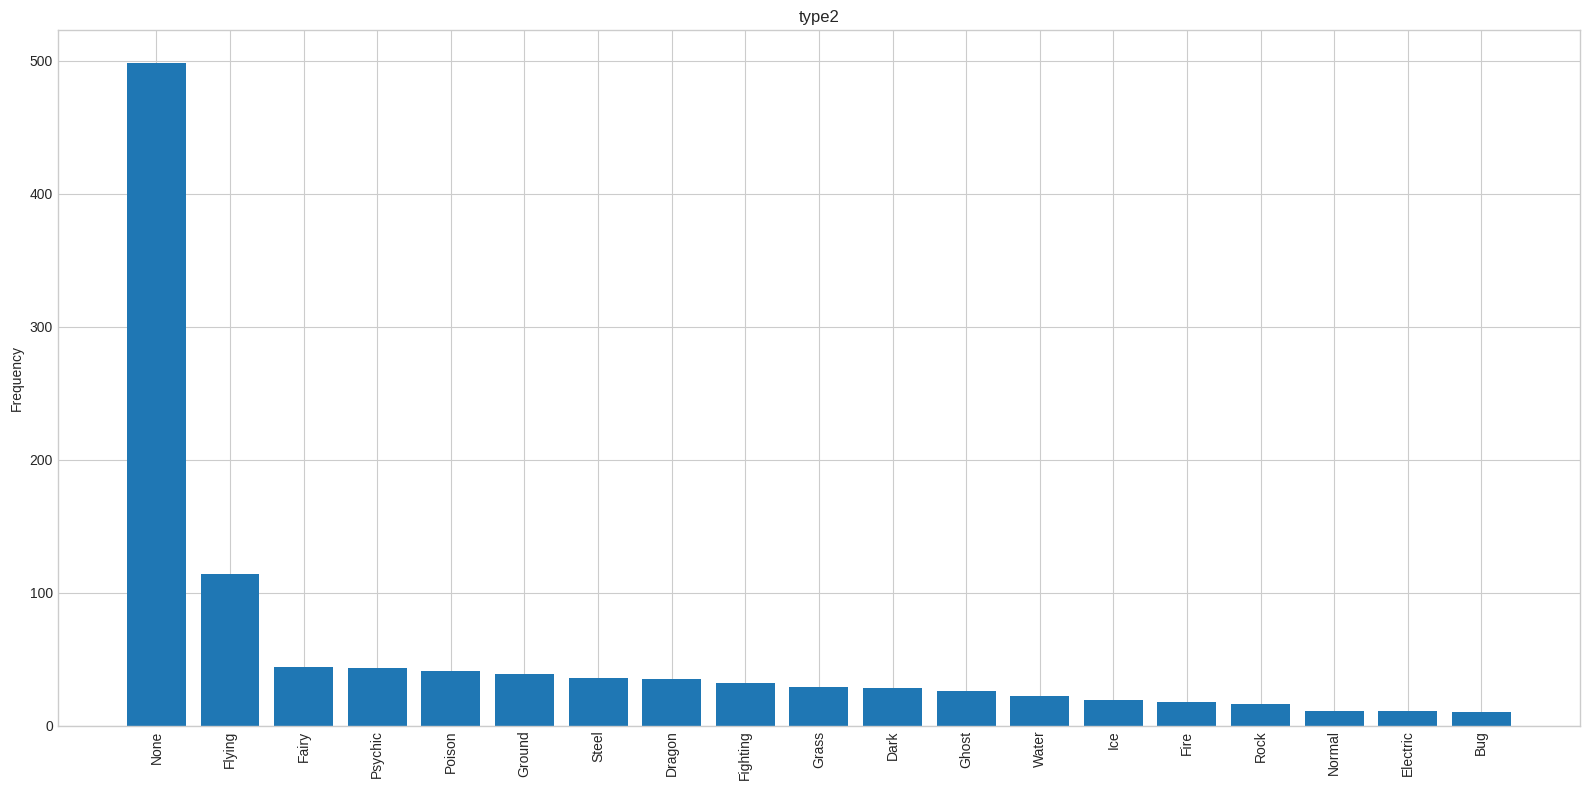

type2: 
 type2
None        498
Flying      114
Fairy        44
Psychic      43
Poison       41
Ground       39
Steel        36
Dragon       35
Fighting     32
Grass        29
Dark         28
Ghost        26
Water        22
Ice          19
Fire         18
Rock         16
Normal       11
Electric     11
Bug          10
Name: count, dtype: int64


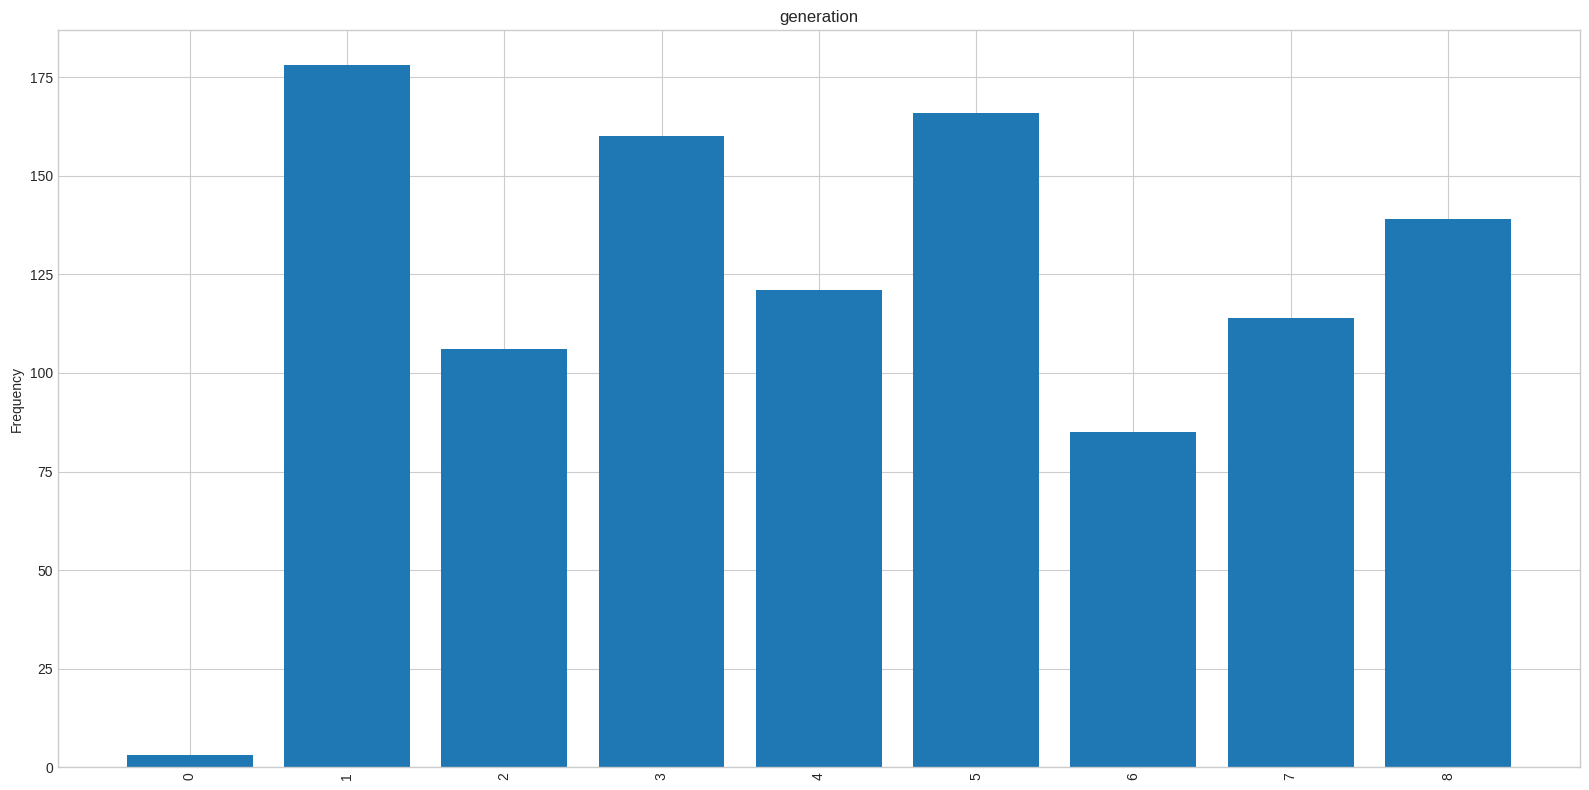

generation: 
 generation
1    178
5    166
3    160
8    139
4    121
7    114
2    106
6     85
0      3
Name: count, dtype: int64


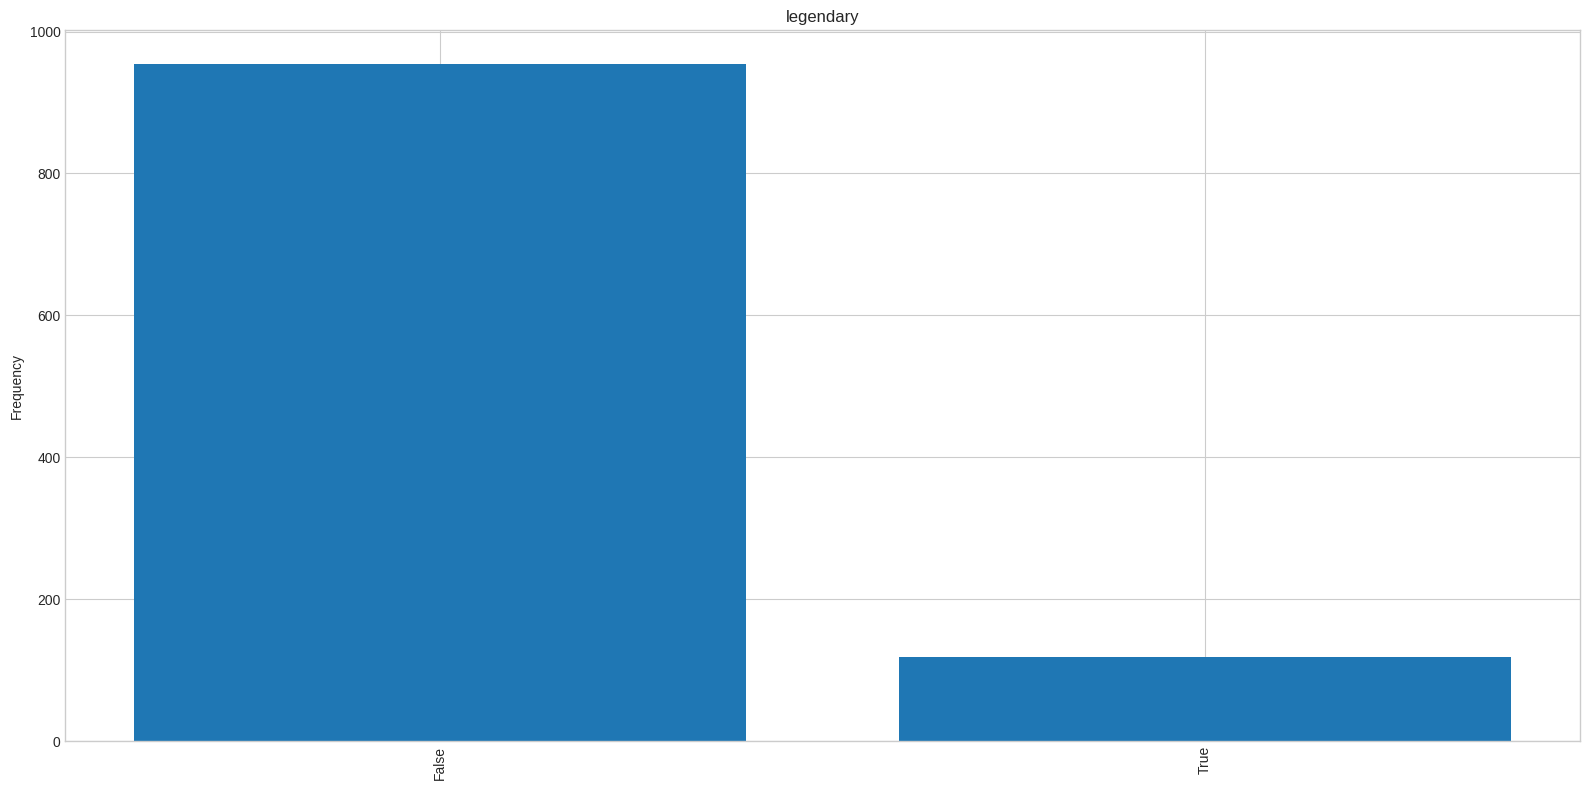

legendary: 
 legendary
False    954
True     118
Name: count, dtype: int64


In [10]:

# Kategorik Değişkenlerin Grafiksel Analizi
def bar_plot(variable):
    var = pokemon_df[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(16,8))
    plt.bar(varValue.index, varValue, width=0.8)
    plt.xticks(varValue.index, varValue.index.values, rotation=90)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.tight_layout()
    plt.show()
    print("{}: \n {}".format(variable, varValue))

category1 = ["type1", "type2", "generation", "legendary"]
for c in category1:
    bar_plot(c)

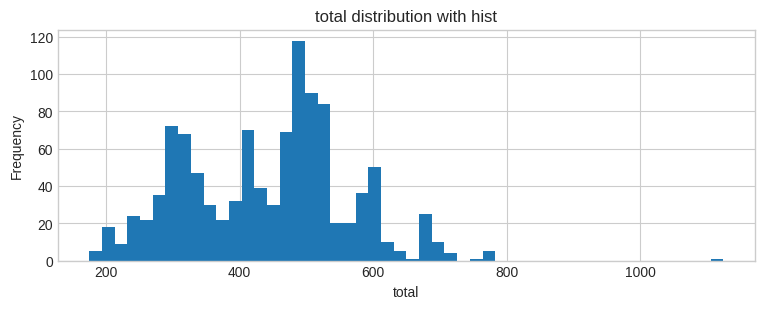

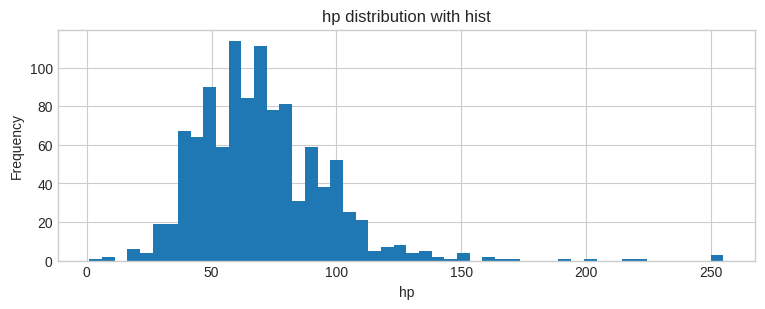

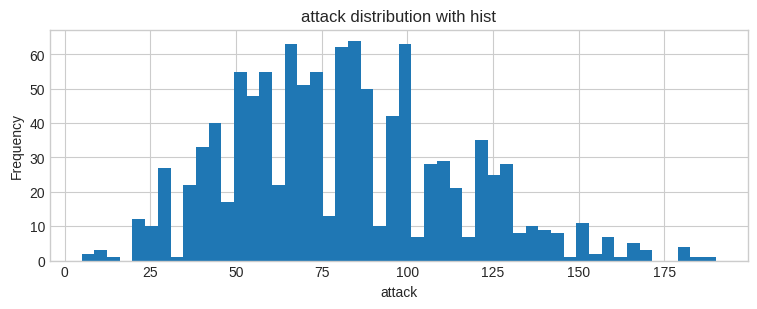

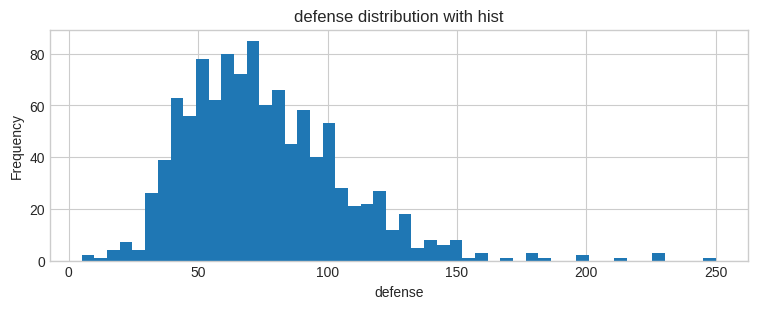

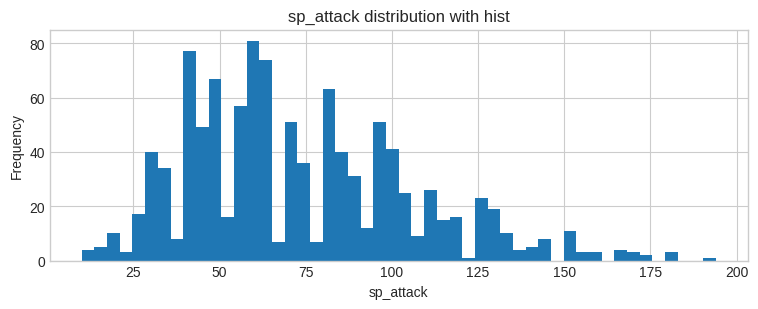

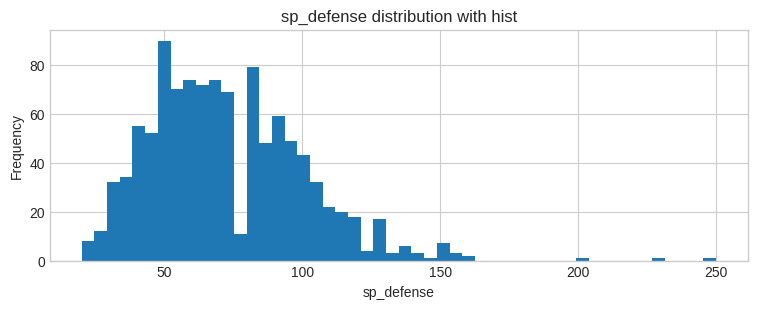

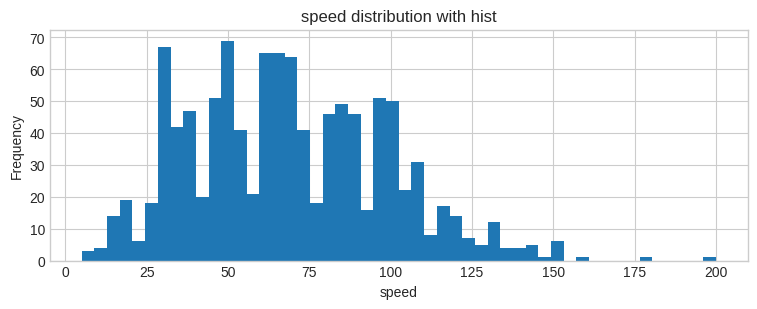

In [11]:
# Sayısal Değişkenlerin Grafiksel Analizi
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(pokemon_df[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

numericVar = ['total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
for n in numericVar:
    plot_hist(n)

In [13]:
# BASİC DATA ANALYSİS
print(pokemon_df[["name", "speed"]].groupby(["name"], as_index=True).mean().sort_values(by="name", ascending=True))






                        speed
name                         
Abomasnow                60.0
Abra                     90.0
Absol                    75.0
Accelgor                145.0
Aegislash Blade Forme    60.0
...                       ...
Zubat                    55.0
Zweilous                 58.0
Zygarde 10% Forme       115.0
Zygarde 50% Forme        95.0
Zygarde Complete Forme   85.0

[1072 rows x 1 columns]


In [14]:
print(pokemon_df[["generation", "hp"]].groupby(["generation"], as_index=False).mean().sort_values(by="generation", ascending=True))

   generation          hp
0           0  105.333333
1           1   66.561798
2           2   71.207547
3           3   66.543750
4           4   73.082645
5           5   71.837349
6           6   69.882353
7           7   69.429825
8           8   76.115108


In [15]:

print(pokemon_df[["name", "attack"]].groupby(["name"], as_index=False).mean().sort_values(by="name", ascending=True))

                        name  attack
0                  Abomasnow    92.0
1                       Abra    20.0
2                      Absol   130.0
3                   Accelgor    70.0
4      Aegislash Blade Forme   150.0
...                      ...     ...
1067                   Zubat    45.0
1068                Zweilous    85.0
1069       Zygarde 10% Forme   100.0
1070       Zygarde 50% Forme   100.0
1071  Zygarde Complete Forme   100.0

[1072 rows x 2 columns]


In [16]:
print(pokemon_df[["name", "defense"]].groupby(["name"], as_index=False).mean().sort_values(by="name", ascending=True))


                        name  defense
0                  Abomasnow     75.0
1                       Abra     15.0
2                      Absol     60.0
3                   Accelgor     40.0
4      Aegislash Blade Forme     50.0
...                      ...      ...
1067                   Zubat     35.0
1068                Zweilous     70.0
1069       Zygarde 10% Forme     71.0
1070       Zygarde 50% Forme    121.0
1071  Zygarde Complete Forme    121.0

[1072 rows x 2 columns]


In [17]:
# Veri Bölme
train_df, test_df = train_test_split(pokemon_df, test_size=0.3, random_state=50)
print(train_df.shape, test_df.shape)

(750, 13) (322, 13)


In [18]:
# Eksik Değerleri Bulma
print(train_df.columns[train_df.isnull().any()])
print(train_df.isnull().sum())

Index([], dtype='object')
number        0
name          0
type1         0
type2         0
total         0
hp            0
attack        0
defense       0
sp_attack     0
sp_defense    0
speed         0
generation    0
legendary     0
dtype: int64


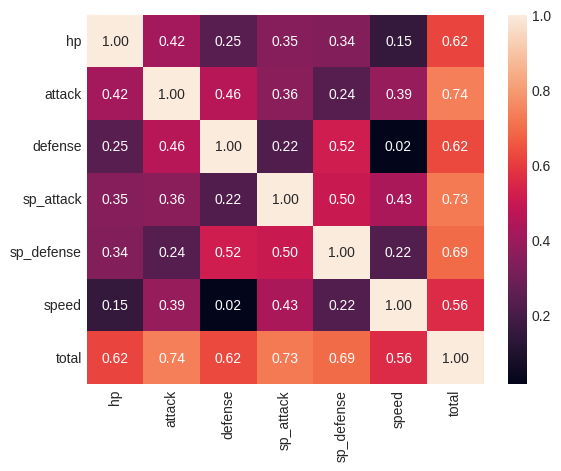

In [19]:
# Görselleştirme
list1 = ["hp", "attack", "defense", "sp_attack", "sp_defense", "speed", "total"]
sns.heatmap(train_df[list1].corr(), annot=True, fmt=".2f")
plt.show()

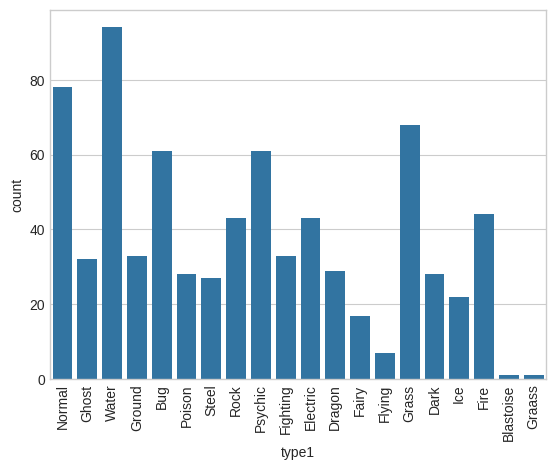

In [21]:
# Özellik Mühendisliği: Gerekirse yeni özellikler ekleme
train_df['family_size'] = train_df['attack'] + train_df['defense'] + 1
sns.countplot(x="type1", data=train_df)
plt.xticks(rotation=90)
plt.show()

In [22]:
# Temizlenen DataFrame'i kaydetme
final_df = train_df.copy()
final_df.to_csv("cleaned_pokemon_dataset.csv", index=False)

In [30]:
# Özellik: Tür başına ortalama toplam istatistik
pokemon_df['type1_ortalama_total'] = pokemon_df.groupby('type1')['total'].transform('mean')

# Özellik: Hızın toplam istatistiklere oranı
pokemon_df['hiz_toplam_orani'] = pokemon_df['speed'] / pokemon_df['total']

# Özellik: Yüksek saldırı göstergesi
pokemon_df['yüksek_saldiri'] = np.where(pokemon_df['attack'] > pokemon_df['attack'].mean(), 1, 0)

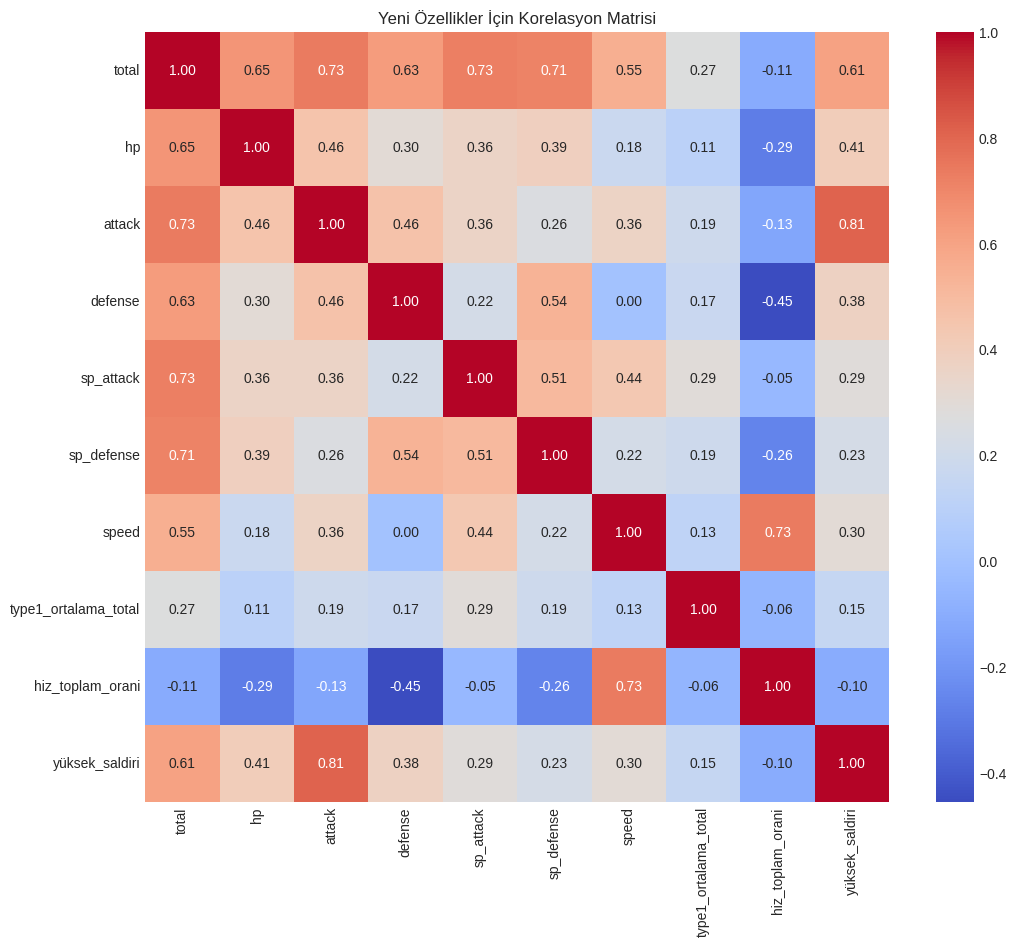

In [31]:
# Yeni Özellikler İçin Korelasyon Matrisi ve Isı Haritası
plt.figure(figsize=(12, 10))
new_corr = pokemon_df[['total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'type1_ortalama_total', 'hiz_toplam_orani', 'yüksek_saldiri']].corr()
sns.heatmap(new_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Yeni Özellikler İçin Korelasyon Matrisi')
plt.show()

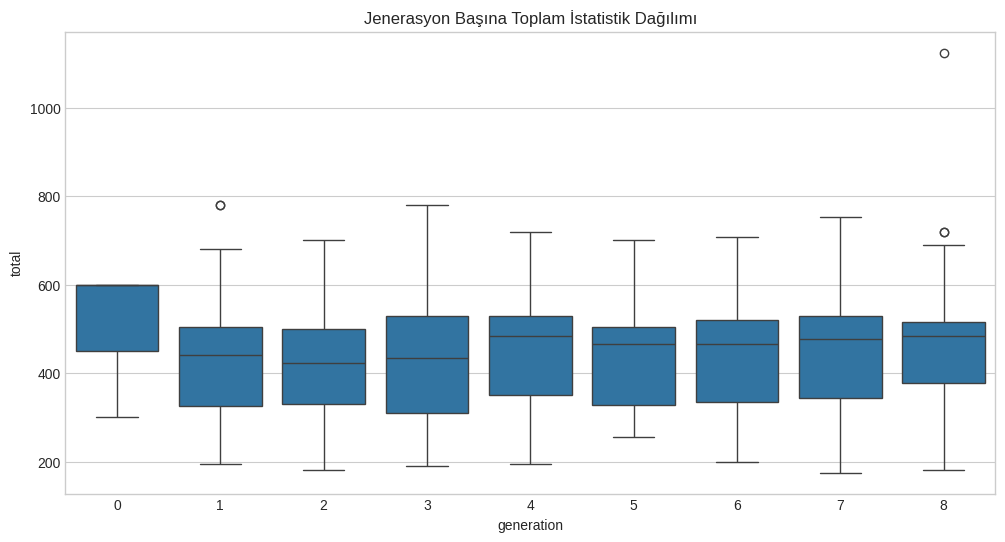

In [33]:
# Jenerasyon Başına Toplam İstatistikler İçin Kutu Grafiği
plt.figure(figsize=(12, 6))
sns.boxplot(x='generation', y='total', data=pokemon_df)
plt.title('Jenerasyon Başına Toplam İstatistik Dağılımı')
plt.show()

# Tahmin Modeli Hazırlığı

In [34]:
# Kategorik sütunları dummy değişkenlerine dönüştür
pokemon_df = pd.get_dummies(pokemon_df, columns=['type1', 'type2'])

# Özellikleri ve hedef değişkeni tanımla
features = pokemon_df.drop(columns=['name', 'total', 'number', 'legendary'])
target = pokemon_df['total']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


In [35]:
# Model Eğitimi: Doğrusal Regresyon
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
# Modeli başlat ve eğit
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
# Tahminler yap
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)
# Modeli değerlendirme
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
# HATA ORANLARİ
print(f'Eğitim MSE: {train_mse:.2f}, R2: {train_r2:.2f}')
print(f'Test MSE: {test_mse:.2f}, R2: {test_r2:.2f}')

Eğitim MSE: 1.96, R2: 1.00
Test MSE: 0.06, R2: 1.00


Eğitim MSE (Mean Squared Error): 1.96, modelin eğitim verilerindeki tahmin hatalarının ortalama karesidir. Düşük bir değer modelin iyi olduğunu gösterir.
Eğitim R2 (R-squared): 1.00, modelin eğitim verilerindeki açıklama gücüdür. 1.00 olması mükemmel uyumu gösterir.
Test MSE: 0.06, modelin test verilerindeki tahmin hatalarının ortalama karesidir. Çok düşük bir değer, modelin genel performansının iyi olduğunu gösterir.
Test R2: 1.00, modelin test verilerindeki açıklama gücüdür. 1.00 olması mükemmel uyumu gösterir.